# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)


In [2]:
import numpy as np 
import pandas as pd
df = pd.read_csv('UNSW-NB15_4.csv')
print("Dataset shape:",df.shape)
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
df.head()

Dataset shape: (440043, 49)


,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,29,18,8,smtp,1459437.5,130766.8672,52,42,255,255.1,1422136554,3572668484,722,80,0,0.1,456.043567,15.530109,1424250009,1424250009.1,3.943843,4.912488,0.00059,0.000473,0.000117,0.2,0.3,Unnamed: 37,Unnamed: 38,,2,2.1,7,4,1,1.1,3,Unnamed: 47,0.4
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.865,19410,1087890,31,29,2,370,http,26404.545,1481982.875,364,746,255,255,389619597,394688654,53,1458,1,0,1031.366,690.220,1424250003,1424250009,16.155,7.871,0.001,0.001,0.000,0,0,1.000,NaN,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001,146,178,31,29,0,0,dns,419841.844,511861.969,2,2,0,0,0,0,73,89,0,0,0.000,0.000,1424250009,1424250009,0.009,0.002,0.000,0.000,0.000,0,0,NaN,NaN,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.054,37812,3380,31,29,19,8,smtp,5503373.500,489360.125,54,42,255,255,4047523379,1903327524,700,80,0,0,65.910,3.155,1424250009,1424250009,1.012,1.303,0.001,0.001,0.000,0,0,NaN,NaN,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.001,146,178,31,29,0,0,dns,612801.688,747114.375,2,2,0,0,0,0,73,89,0,0,0.000,0.000,1424250009,1424250009,0.009,0.004,0.000,0.000,0.000,0,0,NaN,NaN,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633,25056,1094788,31,29,38,390,-,23166.418,1013311.125,446,858,255,255,497111133,526810925,56,1276,0,0,7751.703,5572.343,1424250000,1424250009,19.443,10.085,0.001,0.001,0.000,0,0,NaN,NaN,,9,7,2,3,2,1,6,NaN,0


In [3]:
print('Basic Info:')
print(df.info())
print('\nDescriptive statistics:')
print(df.describe(include='all'))

#missing values
print('\missing values:')
print(df.isnull().sum())
print('unique vlues in each colum :')
print(df.nunique())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440043 entries, 0 to 440042
Data columns (total 49 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   59.166.0.9     440043 non-null  object 
 1   7045           440043 non-null  int64  
 2   149.171.126.7  440043 non-null  object 
 3   25             440043 non-null  object 
 4   tcp            440043 non-null  object 
 5   FIN            440043 non-null  object 
 6   0.201886       440043 non-null  float64
 7   37552          440043 non-null  int64  
 8   3380           440043 non-null  int64  
 9   31             440043 non-null  int64  
 10  29             440043 non-null  int64  
 11  18             440043 non-null  int64  
 12  8              440043 non-null  int64  
 13  smtp           440043 non-null  object 
 14  1459437.5      440043 non-null  float64
 15  130766.8672    440043 non-null  float64
 16  52             440043 non-null  int64  
 17  42             44

##we can observe that the dataframe does not have columns names , that is why we try 
we sudy the dataset to rename the coulumns


In [4]:
unsw_columns= ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']
df.columns = unsw_columns

# Verify the new column names
print(df.columns.tolist())


['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']


In [5]:
print('Basic Info:')
print(df.info())
print('\nDescriptive statistics:')
print(df.describe(include='all'))

#missing values
print('\missing values:')
print(df.isnull().sum())
print('unique vlues in each colum :')
print(df.nunique())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440043 entries, 0 to 440042
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             440043 non-null  object 
 1   sport             440043 non-null  int64  
 2   dstip             440043 non-null  object 
 3   dsport            440043 non-null  object 
 4   proto             440043 non-null  object 
 5   state             440043 non-null  object 
 6   dur               440043 non-null  float64
 7   sbytes            440043 non-null  int64  
 8   dbytes            440043 non-null  int64  
 9   sttl              440043 non-null  int64  
 10  dttl              440043 non-null  int64  
 11  sloss             440043 non-null  int64  
 12  dloss             440043 non-null  int64  
 13  service           440043 non-null  object 
 14  sload             440043 non-null  float64
 15  dload             440043 non-null  float64
 16  spkts   

In [6]:
df.head(5)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.865,19410,1087890,31,29,2,370,http,26404.545,1481982.875,364,746,255,255,389619597,394688654,53,1458,1,0,1031.366,690.220,1424250003,1424250009,16.155,7.871,0.001,0.001,0.000,0,0,1.000,NaN,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001,146,178,31,29,0,0,dns,419841.844,511861.969,2,2,0,0,0,0,73,89,0,0,0.000,0.000,1424250009,1424250009,0.009,0.002,0.000,0.000,0.000,0,0,NaN,NaN,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.054,37812,3380,31,29,19,8,smtp,5503373.500,489360.125,54,42,255,255,4047523379,1903327524,700,80,0,0,65.910,3.155,1424250009,1424250009,1.012,1.303,0.001,0.001,0.000,0,0,NaN,NaN,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.001,146,178,31,29,0,0,dns,612801.688,747114.375,2,2,0,0,0,0,73,89,0,0,0.000,0.000,1424250009,1424250009,0.009,0.004,0.000,0.000,0.000,0,0,NaN,NaN,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633,25056,1094788,31,29,38,390,-,23166.418,1013311.125,446,858,255,255,497111133,526810925,56,1276,0,0,7751.703,5572.343,1424250000,1424250009,19.443,10.085,0.001,0.001,0.000,0,0,NaN,NaN,,9,7,2,3,2,1,6,NaN,0


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
sport,440043.000,29206.596,21228.826,0.000,6269.000,31212.000,47439.000,65535.000
dur,440043.000,0.581,3.694,0.000,0.000,0.005,0.089,60.000
sbytes,440043.000,3805.845,65268.610,0.000,146.000,534.000,2646.000,11063467.000
dbytes,440043.000,26933.534,137865.876,0.000,0.000,304.000,10168.000,12838547.000
sttl,440043.000,82.507,88.489,0.000,31.000,31.000,60.000,255.000
dttl,440043.000,29.458,51.090,0.000,0.000,29.000,29.000,254.000
sloss,440043.000,4.164,25.464,0.000,0.000,0.000,7.000,4158.000
dloss,440043.000,12.246,48.761,0.000,0.000,0.000,8.000,4829.000
sload,440043.000,66943586.633,153132537.844,0.000,304340.484,923524.938,76000000.000,5600000000.000
dload,440043.000,1951191.908,3915267.154,0.000,0.000,76385.219,1053726.125,22906902.000


In [8]:
##data cleaning
## null values
df.isnull().sum()

srcip                    0
sport                    0
dstip                    0
dsport                   0
proto                    0
state                    0
dur                      0
sbytes                   0
dbytes                   0
sttl                     0
dttl                     0
sloss                    0
dloss                    0
service                  0
sload                    0
dload                    0
spkts                    0
dpkts                    0
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smeansz                  0
dmeansz                  0
trans_depth              0
res_bdy_len              0
sjit                     0
djit                     0
stime                    0
ltime                    0
sintpkt                  0
dintpkt                  0
tcprtt                   0
synack                   0
ackdat                   0
is_sm_ips_ports          0
ct_state_ttl             0
c

## can notice that the columns with missing values are attack_cat,
ct_flw_http_mthd ,is_ftp_login and the percentage of missing values is grater than 20%( above 70%) , so we should consider dropping thes three columns.

In [9]:
##data cleaning
df_cleaned = df.drop(columns=[ 'ct_flw_http_mthd', 'is_ftp_login']
)
#relacing the missing values of the attack category by normal
attack_n = []
for i in df_cleaned.attack_cat:
    if pd.isna(i):  
        attack_n.append("normal")
    else:
        attack_n.append(i)  
df_cleaned['attack_cat'] = attack_n
df_cleaned.head()


print(df_cleaned.shape)
df_cleaned.head()


(440043, 47)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.865,19410,1087890,31,29,2,370,http,26404.545,1481982.875,364,746,255,255,389619597,394688654,53,1458,1,0,1031.366,690.220,1424250003,1424250009,16.155,7.871,0.001,0.001,0.000,0,0,,3,1,4,4,1,1,1,normal,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001,146,178,31,29,0,0,dns,419841.844,511861.969,2,2,0,0,0,0,73,89,0,0,0.000,0.000,1424250009,1424250009,0.009,0.002,0.000,0.000,0.000,0,0,,3,5,2,7,1,1,4,normal,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.054,37812,3380,31,29,19,8,smtp,5503373.500,489360.125,54,42,255,255,4047523379,1903327524,700,80,0,0,65.910,3.155,1424250009,1424250009,1.012,1.303,0.001,0.001,0.000,0,0,,1,1,4,7,1,1,3,normal,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.001,146,178,31,29,0,0,dns,612801.688,747114.375,2,2,0,0,0,0,73,89,0,0,0.000,0.000,1424250009,1424250009,0.009,0.004,0.000,0.000,0.000,0,0,,2,5,2,1,1,1,2,normal,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633,25056,1094788,31,29,38,390,-,23166.418,1013311.125,446,858,255,255,497111133,526810925,56,1276,0,0,7751.703,5572.343,1424250000,1424250009,19.443,10.085,0.001,0.001,0.000,0,0,,9,7,2,3,2,1,6,normal,0


In [10]:
print(df_cleaned.shape)
print(df_cleaned.columns.tolist())
len(df_cleaned.columns.tolist())


(440043, 47)
['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']


47

print(df.columns.tolist())

In [11]:
def unique_values(df_cleaned, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df_cleaned[column_name].unique()
        value_counts = df_cleaned[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [12]:
cat_features = df_cleaned.select_dtypes(include='object').columns
unique_values(df_cleaned, cat_features)

Column: srcip
------------------------------
Unique Values (38): ['59.166.0.9' '59.166.0.2' '59.166.0.8' '59.166.0.0' '175.45.176.0'
 '175.45.176.1' '59.166.0.6' '59.166.0.1' '59.166.0.3' '59.166.0.5'
 '10.40.182.3' '10.40.170.2' '175.45.176.2' '59.166.0.4' '59.166.0.7'
 '175.45.176.3' '10.40.85.30' '10.40.182.1' '10.40.85.10' '10.40.85.1'
 '149.171.126.11' '149.171.126.12' '10.40.182.6' '149.171.126.14'
 '149.171.126.13' '149.171.126.8' '149.171.126.17' '149.171.126.18'
 '149.171.126.15' '149.171.126.19' '149.171.126.5' '149.171.126.6'
 '149.171.126.4' '149.171.126.1' '149.171.126.2' '149.171.126.0'
 '149.171.126.10' '149.171.126.7']

Value Counts:
srcip
149.171.126.14    41037
175.45.176.1      40538
175.45.176.0      38614
149.171.126.10    30356
59.166.0.1        27391
59.166.0.4        27216
59.166.0.5        27164
59.166.0.0        27111
59.166.0.2        27050
59.166.0.3        26900
59.166.0.9        26397
59.166.0.7        26055
59.166.0.8        26024
59.166.0.6        25590


##DUPLICATES

Dataset does contain  duplicated row

In [13]:
df_cleaned.duplicated().sum()



133325

In [14]:
# drop the duplicates rows to remain just with unique rows
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.duplicated().sum()

0

### now we can reamrks that there is no remaining duplicates raws and we can checks hte new informations about the dataframe

In [15]:
df_cleaned.shape
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306718 entries, 0 to 440042
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             306718 non-null  object 
 1   sport             306718 non-null  int64  
 2   dstip             306718 non-null  object 
 3   dsport            306718 non-null  object 
 4   proto             306718 non-null  object 
 5   state             306718 non-null  object 
 6   dur               306718 non-null  float64
 7   sbytes            306718 non-null  int64  
 8   dbytes            306718 non-null  int64  
 9   sttl              306718 non-null  int64  
 10  dttl              306718 non-null  int64  
 11  sloss             306718 non-null  int64  
 12  dloss             306718 non-null  int64  
 13  service           306718 non-null  object 
 14  sload             306718 non-null  float64
 15  dload             306718 non-null  float64
 16  spkts             306718 

###OULIERS DETECTIONS

Outliers are data points in a feature (variable) that significantly deviate from the majority of other observations.  
  
They can be unusually:  

High,  

Low,  

Or just different from the rest of the data.  



<Figure size 2000x4000 with 0 Axes>

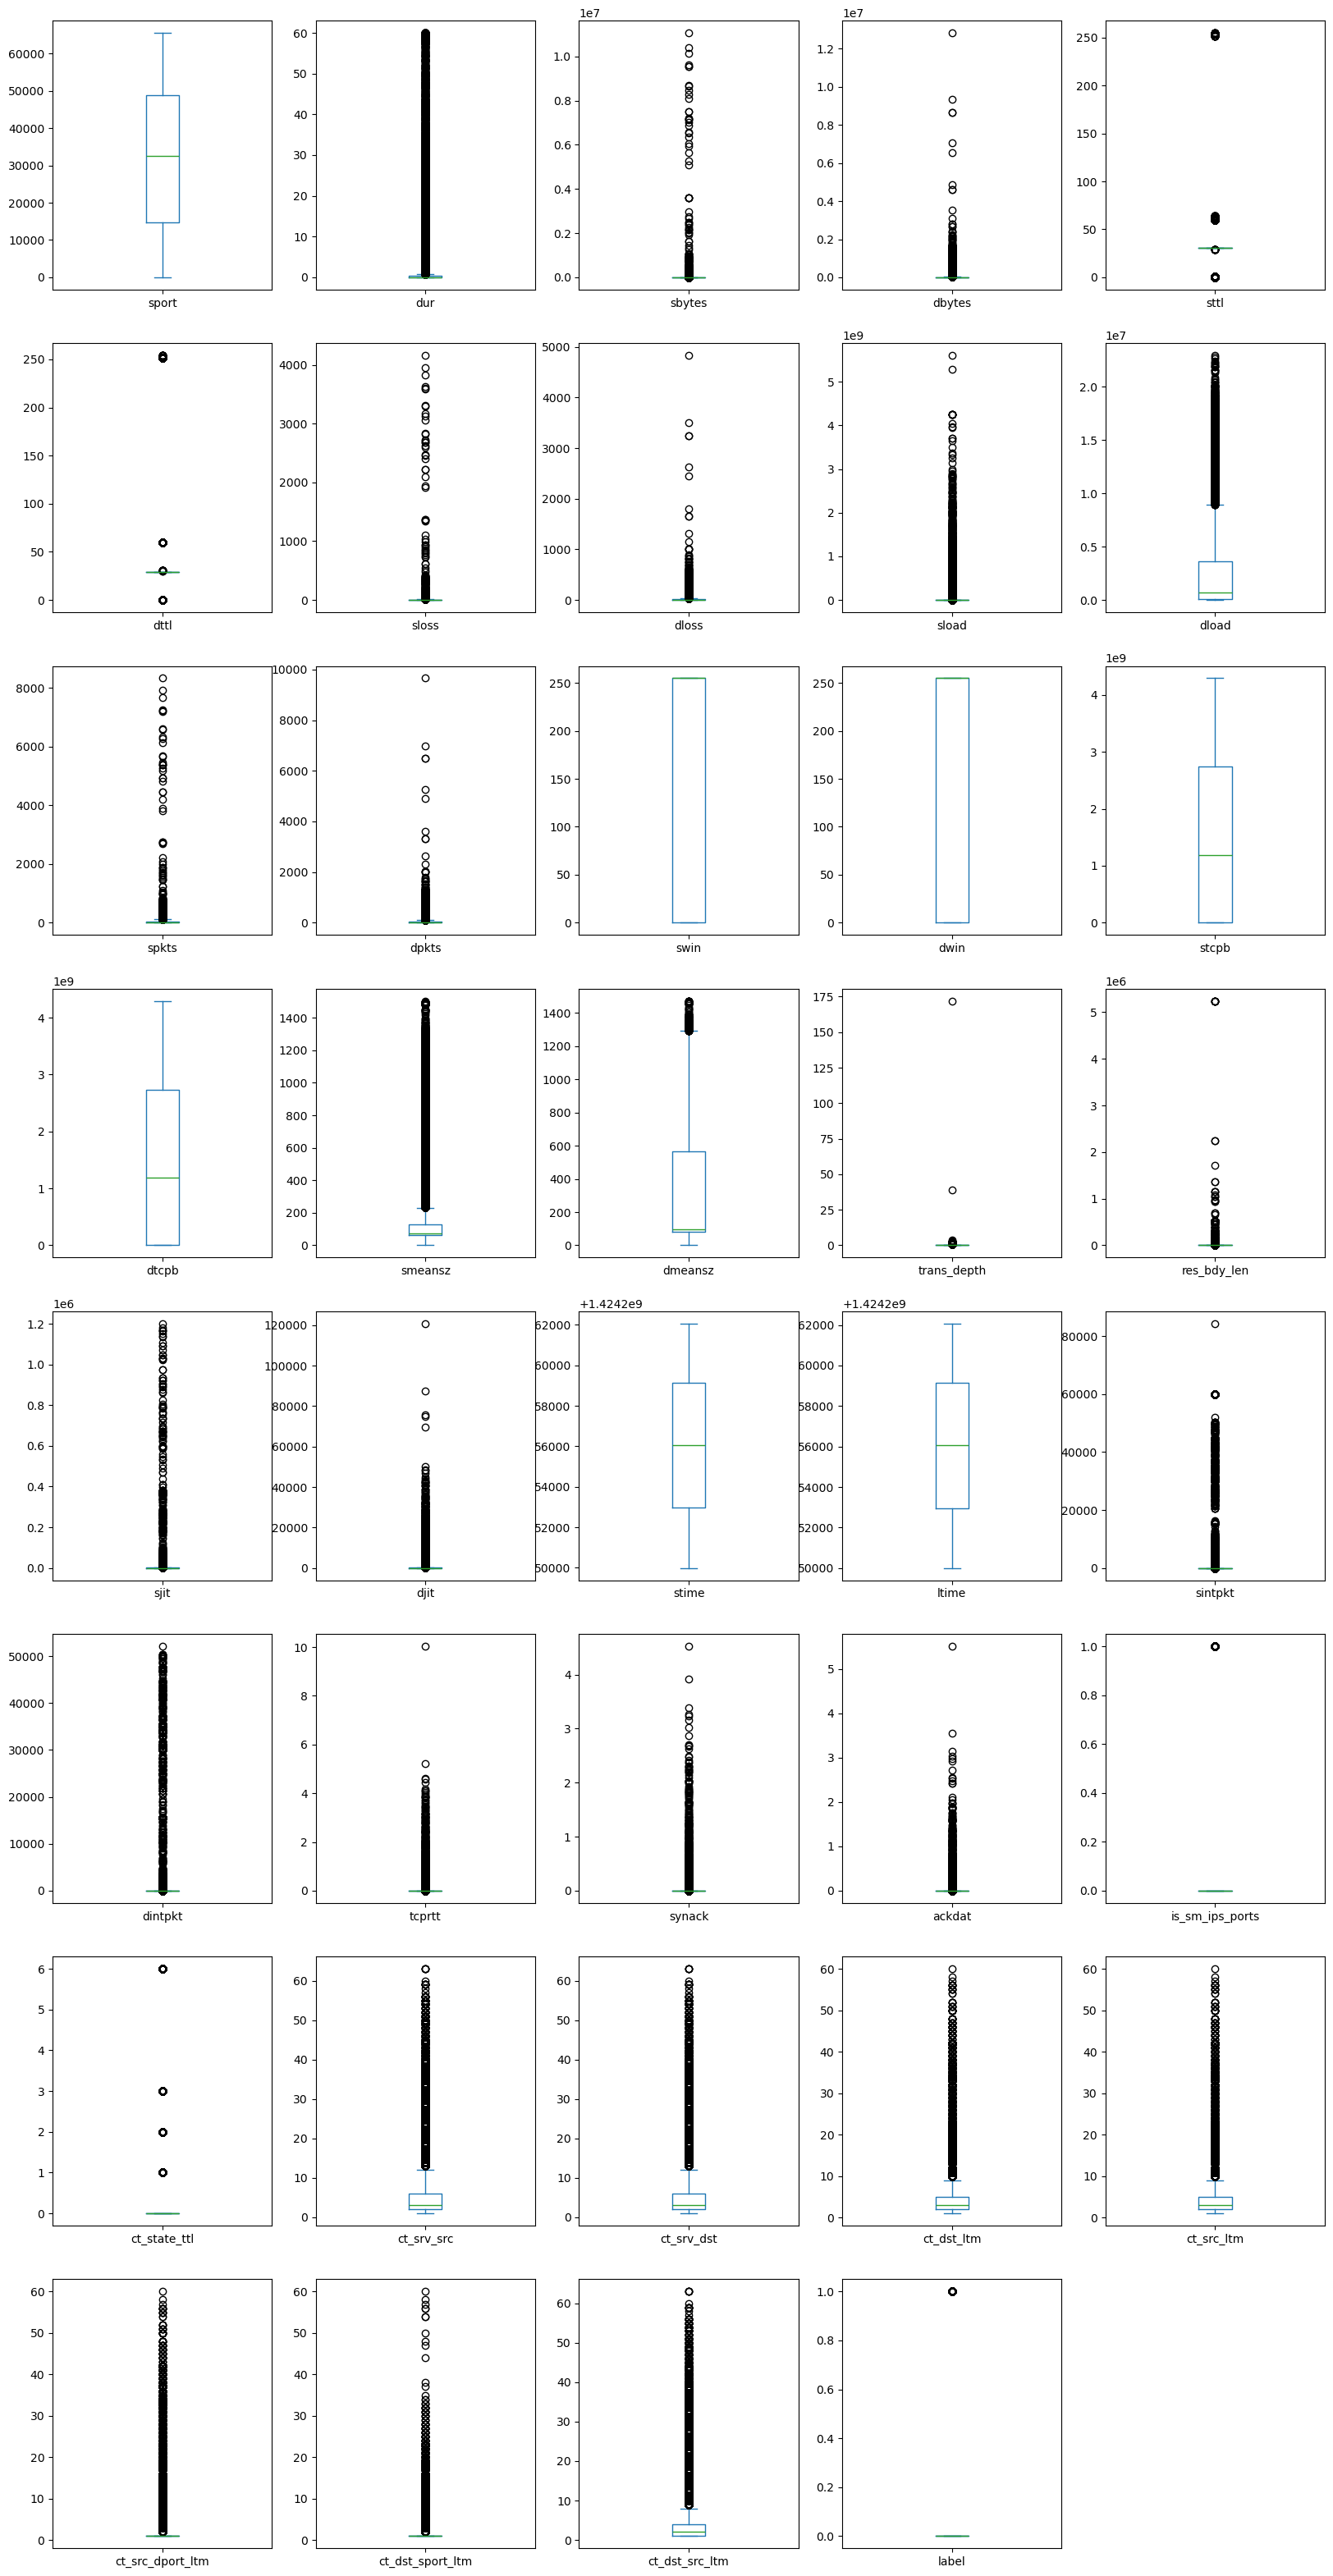

In [16]:
plt.figure(figsize=(20,40))
df_cleaned.plot(kind='box', subplots=True, layout=(8,5), figsize=(20,40))
plt.show()

###outlier detection

In [17]:
# outliers handling
#1. logarithmic transformation for reducing too large values 

for col in ['dur', 'sbytes', 'dbytes', 'sload', 'dload']:
    df_cleaned[col] = np.log1p(df_cleaned[col])

df_cleaned.head()
df.info()
df['attack_cat']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440043 entries, 0 to 440042
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             440043 non-null  object 
 1   sport             440043 non-null  int64  
 2   dstip             440043 non-null  object 
 3   dsport            440043 non-null  object 
 4   proto             440043 non-null  object 
 5   state             440043 non-null  object 
 6   dur               440043 non-null  float64
 7   sbytes            440043 non-null  int64  
 8   dbytes            440043 non-null  int64  
 9   sttl              440043 non-null  int64  
 10  dttl              440043 non-null  int64  
 11  sloss             440043 non-null  int64  
 12  dloss             440043 non-null  int64  
 13  service           440043 non-null  object 
 14  sload             440043 non-null  float64
 15  dload             440043 non-null  float64
 16  spkts             44

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
440038         NaN
440039         NaN
440040         NaN
440041         NaN
440042    Exploits
Name: attack_cat, Length: 440043, dtype: object

In [18]:
from sklearn.preprocessing import RobustScaler

cols_to_scale = ['sjit', 'djit', 'tcprtt', 'synack', 'ackdat']
scaler = RobustScaler()
df_cleaned[cols_to_scale] = scaler.fit_transform(df_cleaned[cols_to_scale])
df_cleaned.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,1.926,9.874,13.900,31,29,2,370,http,10.181,14.209,364,746,255,255,389619597,394688654,53,1458,1,0,1.293,8.369,1424250003,1424250009,16.155,7.871,0.198,0.242,0.071,0,0,,3,1,4,4,1,1,1,normal,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001,4.990,5.187,31,29,0,0,dns,12.948,13.146,2,2,0,0,0,0,73,89,0,0,-0.042,-0.219,1424250009,1424250009,0.009,0.002,-0.894,-0.893,-0.879,0,0,,3,5,2,7,1,1,4,normal,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053,10.540,8.126,31,29,19,8,smtp,15.521,13.101,54,42,255,255,4047523379,1903327524,700,80,0,0,0.043,-0.180,1424250009,1424250009,1.012,1.303,0.061,0.068,0.079,0,0,,1,1,4,7,1,1,3,normal,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.001,4.990,5.187,31,29,0,0,dns,13.326,13.524,2,2,0,0,0,0,73,89,0,0,-0.042,-0.219,1424250009,1424250009,0.009,0.004,-0.894,-0.893,-0.879,0,0,,2,5,2,1,1,1,2,normal,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,2.265,10.129,13.906,31,29,38,390,-,10.051,13.829,446,858,255,255,497111133,526810925,56,1276,0,0,9.995,69.110,1424250000,1424250009,19.443,10.085,0.033,0.025,0.107,0,0,,9,7,2,3,2,1,6,normal,0


In [19]:
print(cat_features)


Index(['srcip', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd',
       'attack_cat'],
      dtype='object')


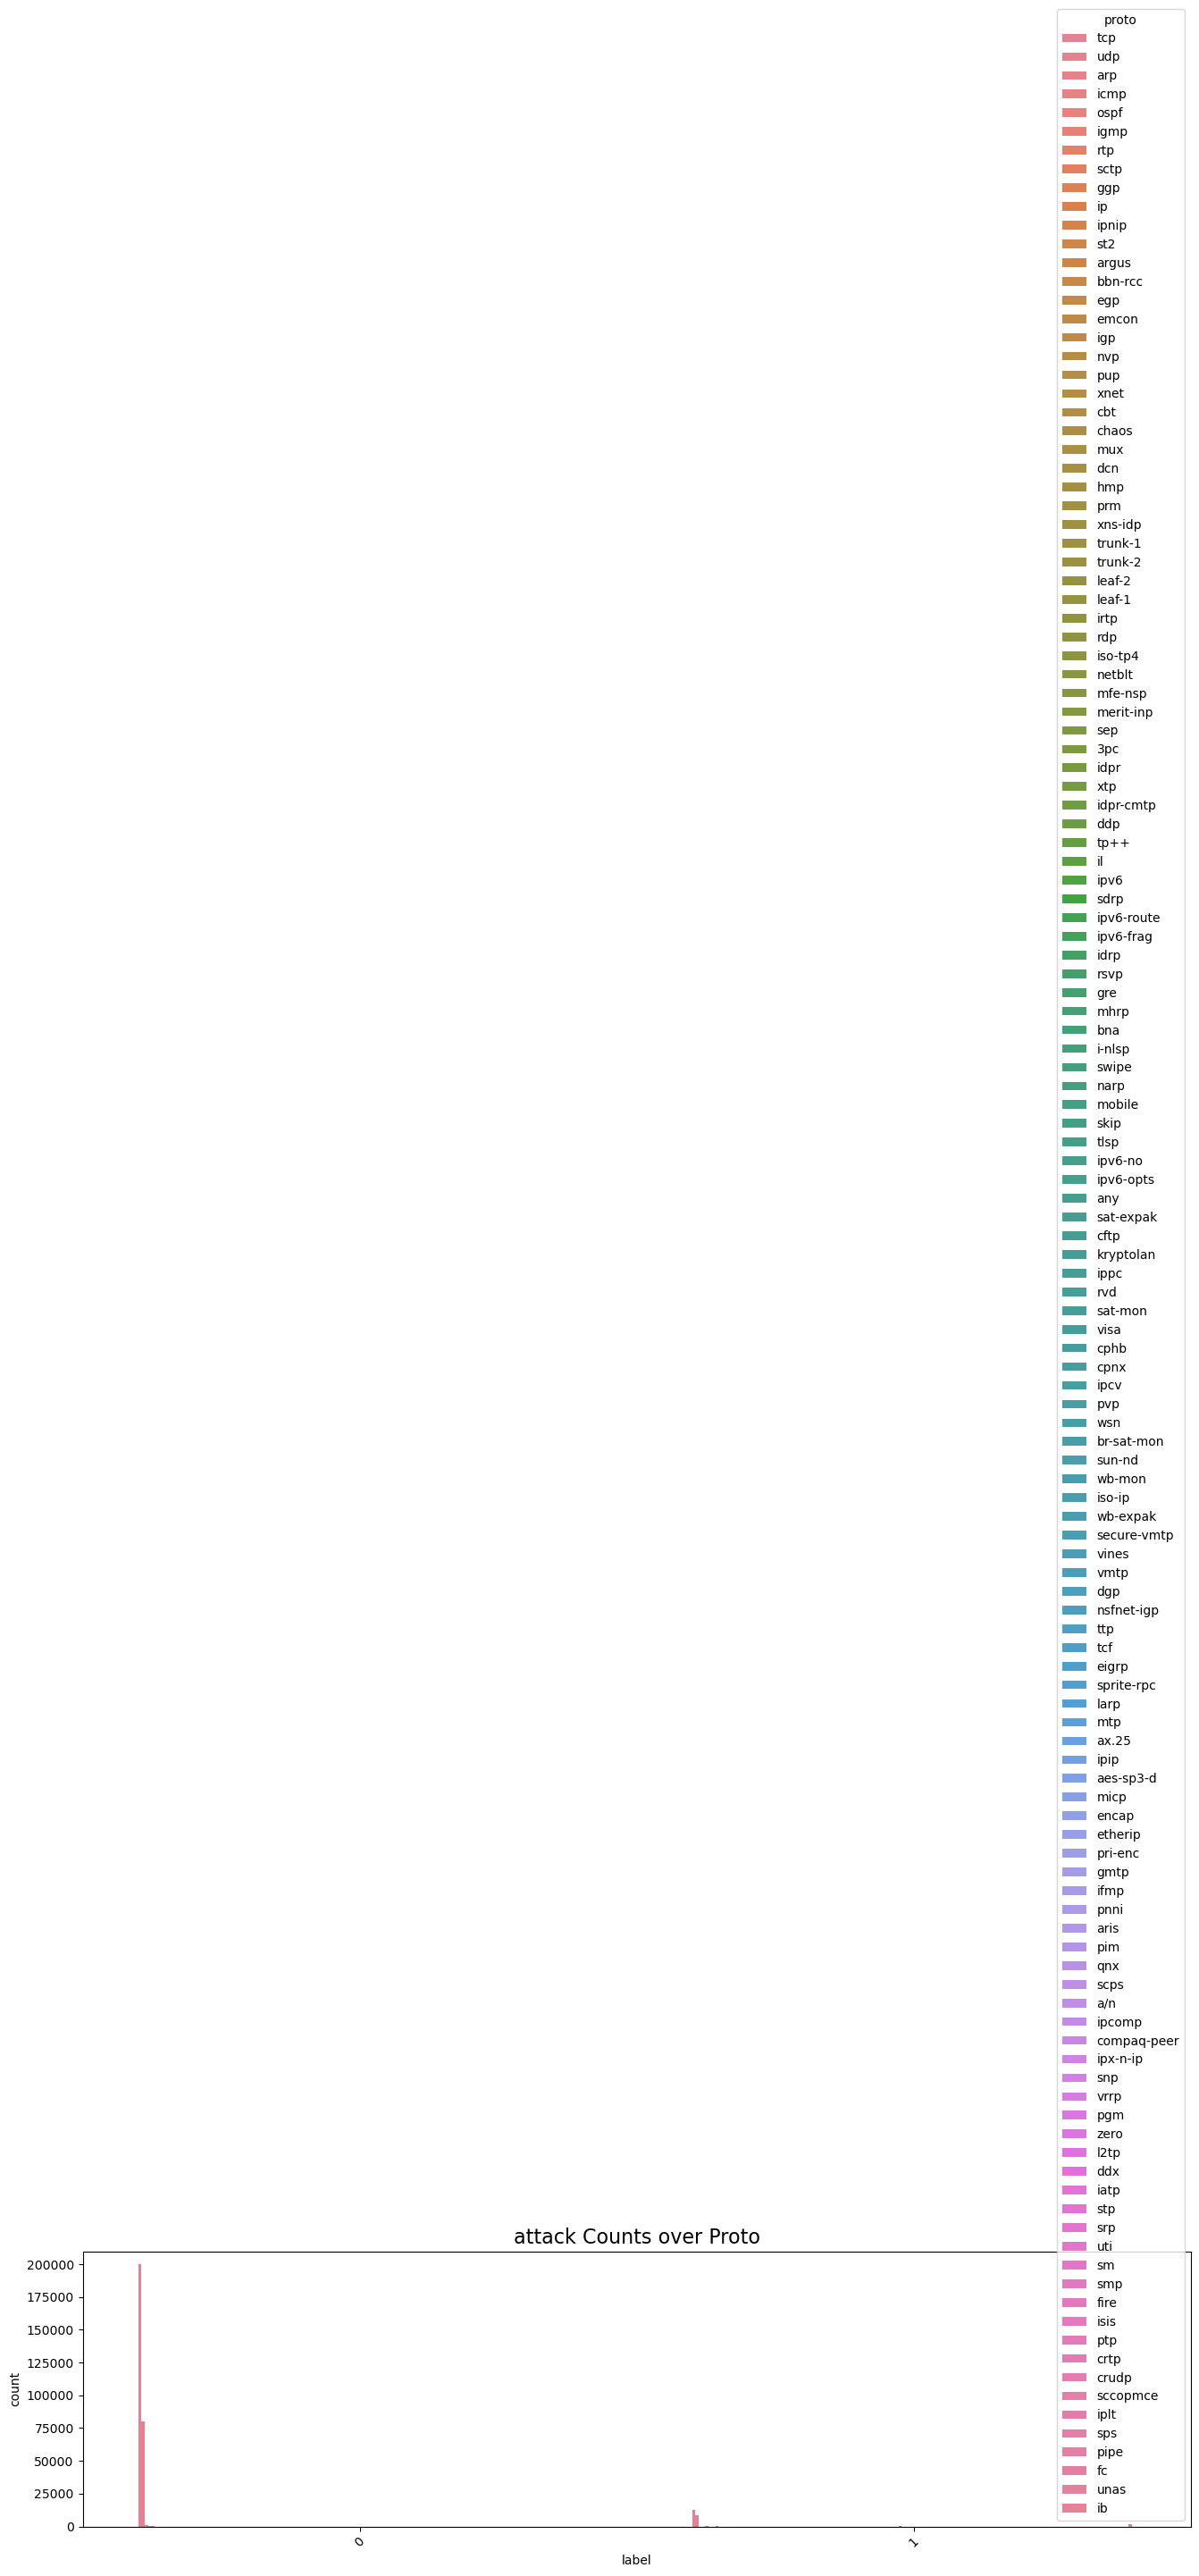

In [20]:
plt.figure(figsize=(16,4))
sns.countplot(x='label',data=df_cleaned,hue='proto')
plt.xticks(rotation=45)
plt.title('attack Counts over Proto',fontdict={'fontsize':16})
plt.show()

In [21]:
df_cleaned["proto"].value_counts(normalize=True)

proto
tcp    0.693
udp    0.290
unas   0.005
arp    0.003
ospf   0.002
        ... 
xtp    0.000
idpr   0.000
ib     0.000
igmp   0.000
rtp    0.000
Name: proportion, Length: 133, dtype: float64

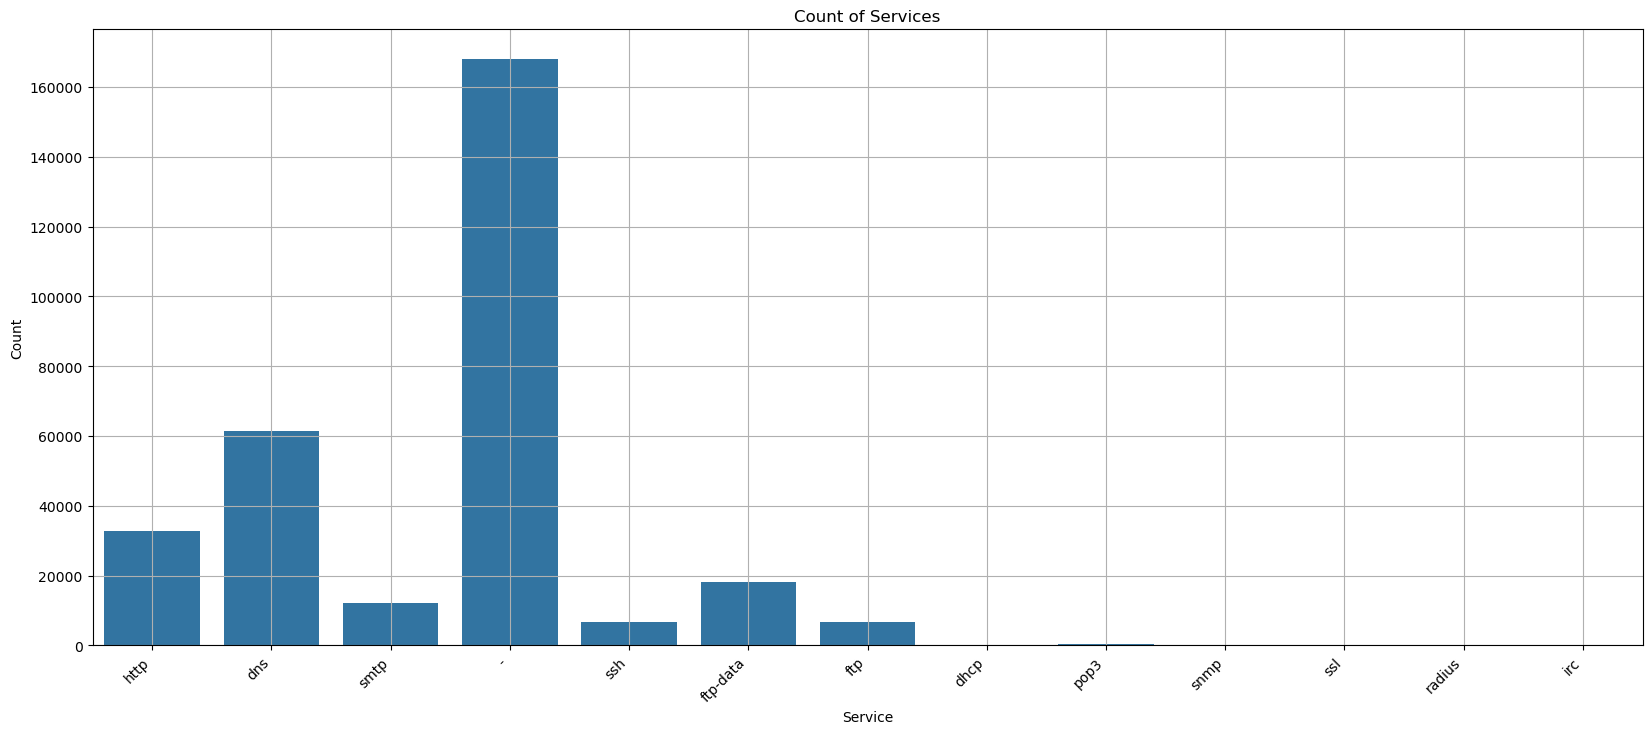

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df_cleaned)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

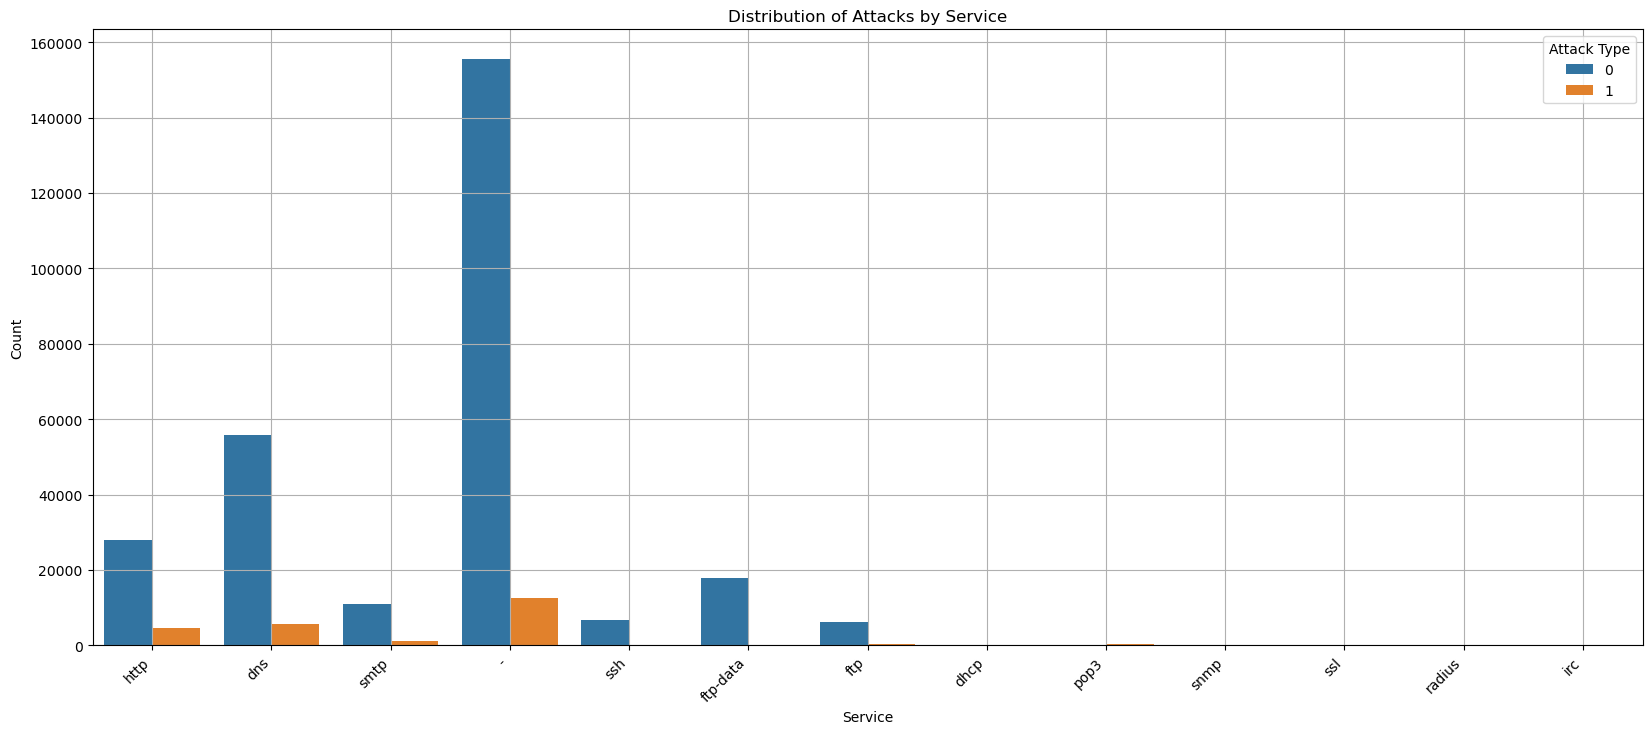

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='label', data=df_cleaned)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

#### encoding categorical features

In [24]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['srcip', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd',
       'attack_cat']
for x in clm:
    df_cleaned[x]=le.fit_transform(df_cleaned[x])
df_cleaned.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,37,9685,19,47328,113,4,1.926,9.874,13.900,31,29,2,370,5,10.181,14.209,364,746,255,255,389619597,394688654,53,1458,1,0,1.293,8.369,1424250003,1424250009,16.155,7.871,0.198,0.242,0.071,0,0,0,3,1,4,4,1,1,1,9,0
1,30,1421,21,35832,119,1,0.001,4.990,5.187,31,29,0,0,2,12.948,13.146,2,2,0,0,0,0,73,89,0,0,-0.042,-0.219,1424250009,1424250009,0.009,0.002,-0.894,-0.893,-0.879,0,0,0,3,5,2,7,1,1,4,9,0
2,30,21553,19,12608,113,4,0.053,10.540,8.126,31,29,19,8,9,15.521,13.101,54,42,255,255,4047523379,1903327524,700,80,0,0,0.043,-0.180,1424250009,1424250009,1.012,1.303,0.061,0.068,0.079,0,0,0,1,1,4,7,1,1,3,9,0
3,36,45212,21,35832,119,1,0.001,4.990,5.187,31,29,0,0,2,13.326,13.524,2,2,0,0,0,0,73,89,0,0,-0.042,-0.219,1424250009,1424250009,0.009,0.004,-0.894,-0.893,-0.879,0,0,0,2,5,2,1,1,1,2,9,0
4,28,59922,25,46490,113,4,2.265,10.129,13.906,31,29,38,390,0,10.051,13.829,446,858,255,255,497111133,526810925,56,1276,0,0,9.995,69.110,1424250000,1424250009,19.443,10.085,0.033,0.025,0.107,0,0,0,9,7,2,3,2,1,6,9,0


#### Traint-test-split

In [25]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(["label", "attack_cat"], axis=1)
y = df_cleaned["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43)

In [26]:
train_index = X_train.columns
train_index

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm'],
      dtype='object')

####  Feature Engineering

In [27]:
# Purpose: Rank features based on how informative they are with respect to the class labels, using mutual information.
# Use case: Helps in selecting the most relevant features for building a more interpretable, faster, and potentially more accurate classification model
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

sttl               0.235
sbytes             0.231
dttl               0.229
dstip              0.227
srcip              0.224
ct_state_ttl       0.223
dbytes             0.196
dmeansz            0.171
sload              0.163
smeansz            0.158
dintpkt            0.147
dload              0.145
dpkts              0.132
dur                0.132
tcprtt             0.128
synack             0.126
ackdat             0.126
state              0.111
dsport             0.090
sintpkt            0.087
sjit               0.080
spkts              0.077
djit               0.066
dloss              0.064
proto              0.059
swin               0.058
dwin               0.058
sloss              0.058
ct_dst_ltm         0.058
ct_dst_sport_ltm   0.057
sport              0.051
ct_src_ltm         0.044
ct_srv_dst         0.038
ct_src_dport_ltm   0.037
ct_srv_src         0.031
ct_dst_src_ltm     0.030
res_bdy_len        0.026
service            0.015
ltime              0.013
stime              0.012


In [28]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

#### Feature Selection

In [29]:
# Uses mutual information to rank features by their relevance to the target variable
# Returns the names or indices of the selected features from train_index
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['srcip', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes',
       'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts',
       'swin', 'dwin', 'smeansz', 'dmeansz', 'sjit', 'djit', 'sintpkt',
       'dintpkt', 'tcprtt', 'synack', 'ackdat', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_dst_sport_ltm'],
      dtype='object')

In [30]:
columns=['srcip', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes',
       'sttl', 'dttl']

#We will continue our model with top 10 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

####  Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

 #### MODEL BUILD

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
RandomForest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
RandomForest = RandomForest_model.fit(X_train, y_train)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [34]:
#it's a helper function in order to evaluate our model if it's overfit or underfit.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [35]:
eval_metric(RandomForest, X_train, y_train, X_test, y_test)

Test_Set
[[27949   142]
 [  151  2430]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28091
           1       0.94      0.94      0.94      2581

    accuracy                           0.99     30672
   macro avg       0.97      0.97      0.97     30672
weighted avg       0.99      0.99      0.99     30672


Train_Set
[[253162    208]
 [   213  22463]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    253370
           1       0.99      0.99      0.99     22676

    accuracy                           1.00    276046
   macro avg       0.99      0.99      0.99    276046
weighted avg       1.00      1.00      1.00    276046



#### HYPERPARAMETER TUNING

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [50, 64],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

In [37]:
# Initialize the Random Forest model
RF_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
RF_grid_model = GridSearchCV(
    estimator=RF_model,
    param_grid=param_grid_rf,
    scoring="f1",           # or "f1_macro" if you have multiple classes
    n_jobs=-1,
    return_train_score=True
)

# Fit to training data
RF_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 64]},
             return_train_score=True, scoring='f1')

In [38]:
RF_grid_model.best_score_


0.8889475809689682

In [39]:
RF_grid_model.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 64}

#### FINAL MODEL

In [40]:
RandomForest_model = RandomForestClassifier(
    bootstrap= False,          # whether to use bootstrap samples
    max_depth= 6,          # depth of each tree
    max_features= 'sqrt',     # number of features to consider for the best split
    min_samples_leaf= 4,      # min samples at leaf node
    min_samples_split= 2,     # min samples to split a node
    n_estimators= 50,        # number of trees
)

In [41]:
RandomForest2 = RandomForest_model.fit(X_train, y_train)

#### EVALUATION

In [42]:
y_pred = RandomForest2.predict(X_test)
y_pred_proba = RandomForest2.predict_proba(X_test)

rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)

In [43]:
eval_metric(RandomForest2, X_train, y_train, X_test, y_test)

Test_Set
[[27524   567]
 [   43  2538]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28091
           1       0.82      0.98      0.89      2581

    accuracy                           0.98     30672
   macro avg       0.91      0.98      0.94     30672
weighted avg       0.98      0.98      0.98     30672


Train_Set
[[248092   5278]
 [   319  22357]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    253370
           1       0.81      0.99      0.89     22676

    accuracy                           0.98    276046
   macro avg       0.90      0.98      0.94    276046
weighted avg       0.98      0.98      0.98    276046



####  FEATURE IMPORTANCE

In [44]:
# Use the trained Random Forest model
model = RF_grid_model.best_estimator_  # or just RF_model if not using grid search

# Extract feature importances
importances = model.feature_importances_

# Create a DataFrame for easy inspection
feats = pd.DataFrame(index=X[columns].columns, data=importances, columns=['RF_importance'])

# Sort by importance descending
rf_imp_feats = feats.sort_values("RF_importance", ascending=False)

# Display
rf_imp_feats

,RF_importance
sttl,0.319
srcip,0.246
dttl,0.153
state,0.100
dbytes,0.055
sbytes,0.040
dstip,0.033
dur,0.026
dsport,0.024
proto,0.005


In [45]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [46]:
y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array([' Fuzzers ', ' Fuzzers ', ' Fuzzers ', ..., ' Fuzzers ',
       ' Reconnaissance ', ' Fuzzers '], dtype=object)

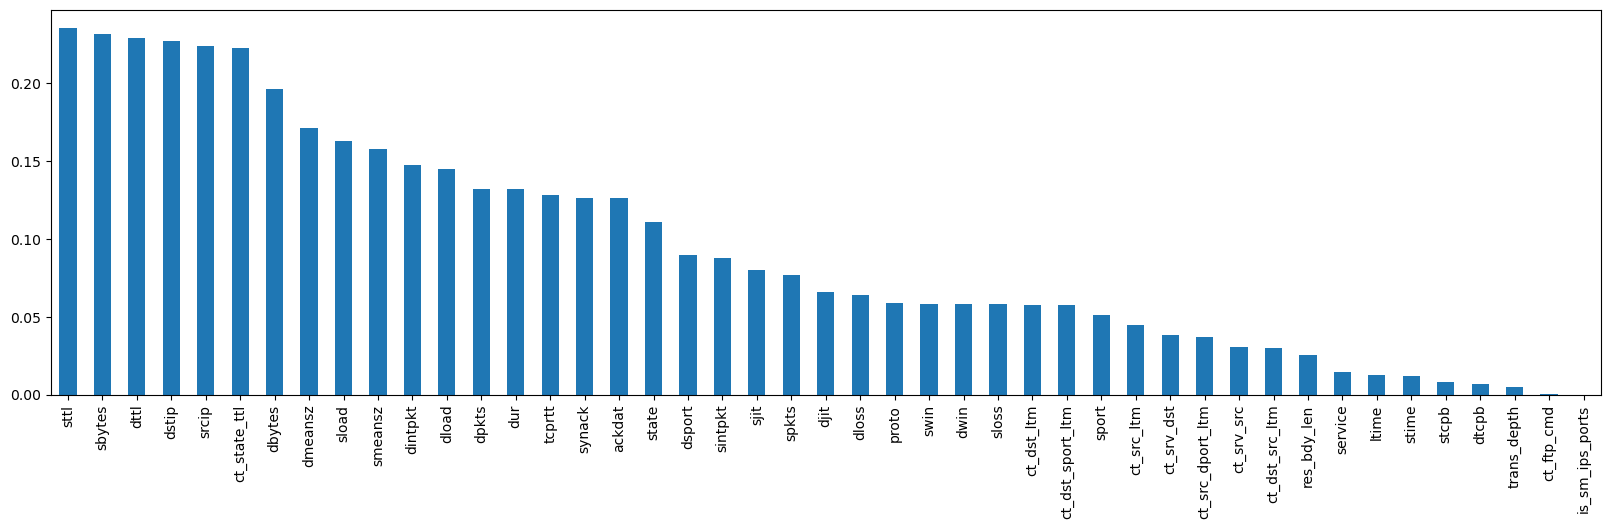

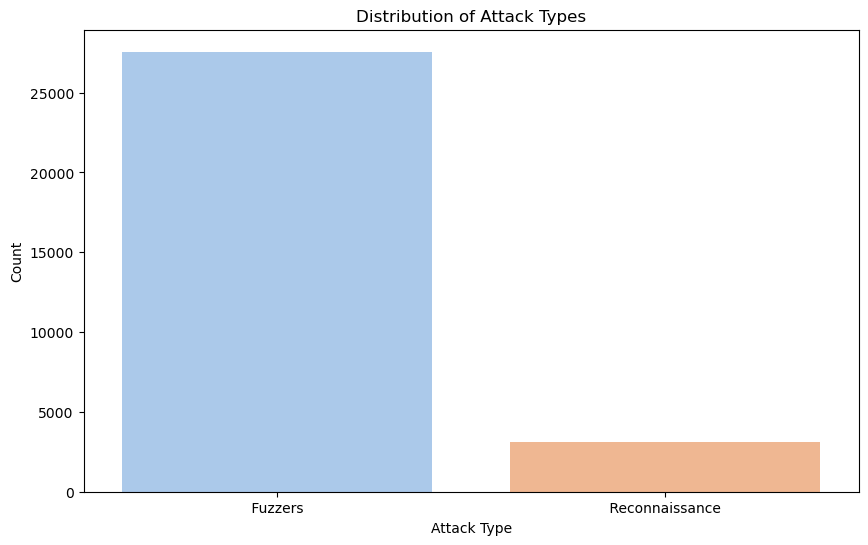

In [47]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_string, palette="pastel")

# Add labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Show the plot
plt.show()